In [24]:
import os
import cv2
import numpy as np
from sklearn.model_selection import KFold
from google.colab import drive
import matplotlib.pyplot as plt

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
# Data directory path
data_dir = '/content/drive/MyDrive/CVPR/Animals'

# Initialize empty lists to store images and labels
images, labels = [], []

# Iterate through subdirectories (classes) and load images
for class_dir in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_dir)
    if os.path.isdir(class_path):
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
            if img is not None:
                img_resized = cv2.resize(img, (64, 64))  # Resize to 64x64
                images.append(img_resized)
                labels.append(class_dir)

# Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)


images = np.array(images)
labels = np.array(labels)


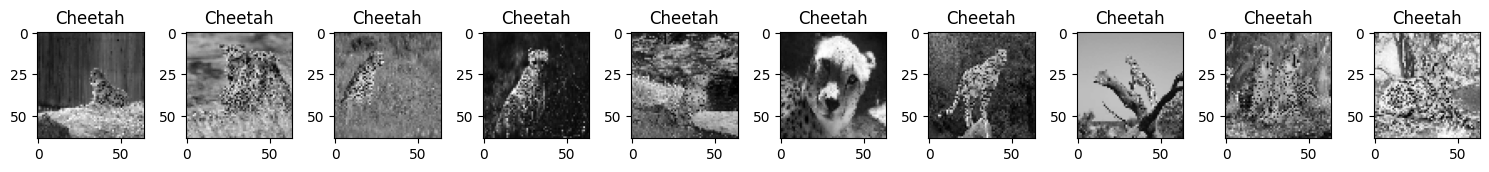

In [43]:
# --- Display the first 10 images ---
plt.figure(figsize=(15, 10))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(labels[i])

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()

In [37]:
kf = KFold(n_splits=5, shuffle=True, random_state=41)
print(kf)

KFold(n_splits=5, random_state=41, shuffle=True)


In [38]:
from collections import Counter
import matplotlib.pyplot as plt

def euclidean_distance(img1, img2):
    return np.sqrt(np.sum((img1 - img2) ** 2))

def k_nearest_neighbors(train_images, train_labels, test_image, K):
    distances = [(euclidean_distance(test_image, train_img), label)
                 for train_img, label in zip(train_images, train_labels)]
    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest = [label for _, label in sorted_distances[:K]]
    return Counter(k_nearest).most_common(1)[0][0]

k_values = range(1, 30)
accuracy_results = []

for K in k_values:
    fold_accuracies = []
    for train_idx, test_idx in kf.split(images):
        train_images, test_images = images[train_idx], images[test_idx]
        train_labels, test_labels = labels[train_idx], labels[test_idx]
        correct_predictions = 0

        for img, true_label in zip(test_images, test_labels):
            predicted_label = k_nearest_neighbors(train_images, train_labels, img, K)
            if predicted_label == true_label:
                correct_predictions += 1

        fold_accuracy = correct_predictions / len(test_labels)
        fold_accuracies.append(fold_accuracy)

    average_accuracy = np.mean(fold_accuracies)
    accuracy_results.append(average_accuracy)
    print(average_accuracy)


0.2823529411764706
0.2823529411764706
0.25882352941176473
0.27647058823529413
0.2823529411764706
0.29411764705882354
0.25882352941176473
0.2529411764705883
0.24705882352941178
0.23529411764705882
0.24117647058823527
0.2529411764705883
0.2529411764705883
0.27647058823529413
0.2647058823529412
0.27647058823529413
0.27647058823529413
0.2647058823529412
0.2647058823529412
0.26470588235294124
0.2529411764705882
0.24705882352941178
0.24117647058823527
0.2647058823529412
0.22941176470588234
0.25882352941176473
0.2529411764705882
0.2823529411764706
0.2647058823529412


In [40]:
centroids = np.mean(accuracy_results, axis=0)
print(centroids)

0.2620689655172414


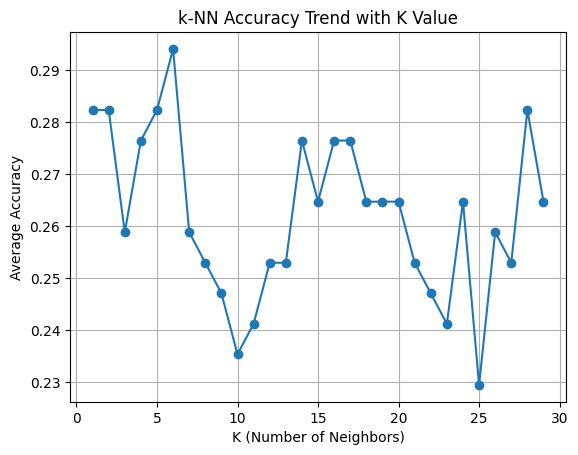

In [41]:
plt.plot(k_values, accuracy_results, marker='o')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Average Accuracy')
plt.title('k-NN Accuracy Trend with K Value')
plt.grid(True)
plt.show()